In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint, solve_ivp, ode
import time as tm

/var/folders/8j/_z3hb0md2ts8q3jtwg2ty3j00000gn/T/ipykernel_30810/59740242.py:9: RuntimeWarning: invalid value encountered in log
  dx[0] = x1 * (1 - x1) * (4 * y1 - 2) + T * x1 * (1 - x1) * np.log( (1-x1) /x1)
/var/folders/8j/_z3hb0md2ts8q3jtwg2ty3j00000gn/T/ipykernel_30810/59740242.py:10: RuntimeWarning: invalid value encountered in log
  dx[1] = y1 * (4 * x1 - 2) * (1 - y1) + T * y1 * (1 - y1) * np.log( (1-y1) / y1)


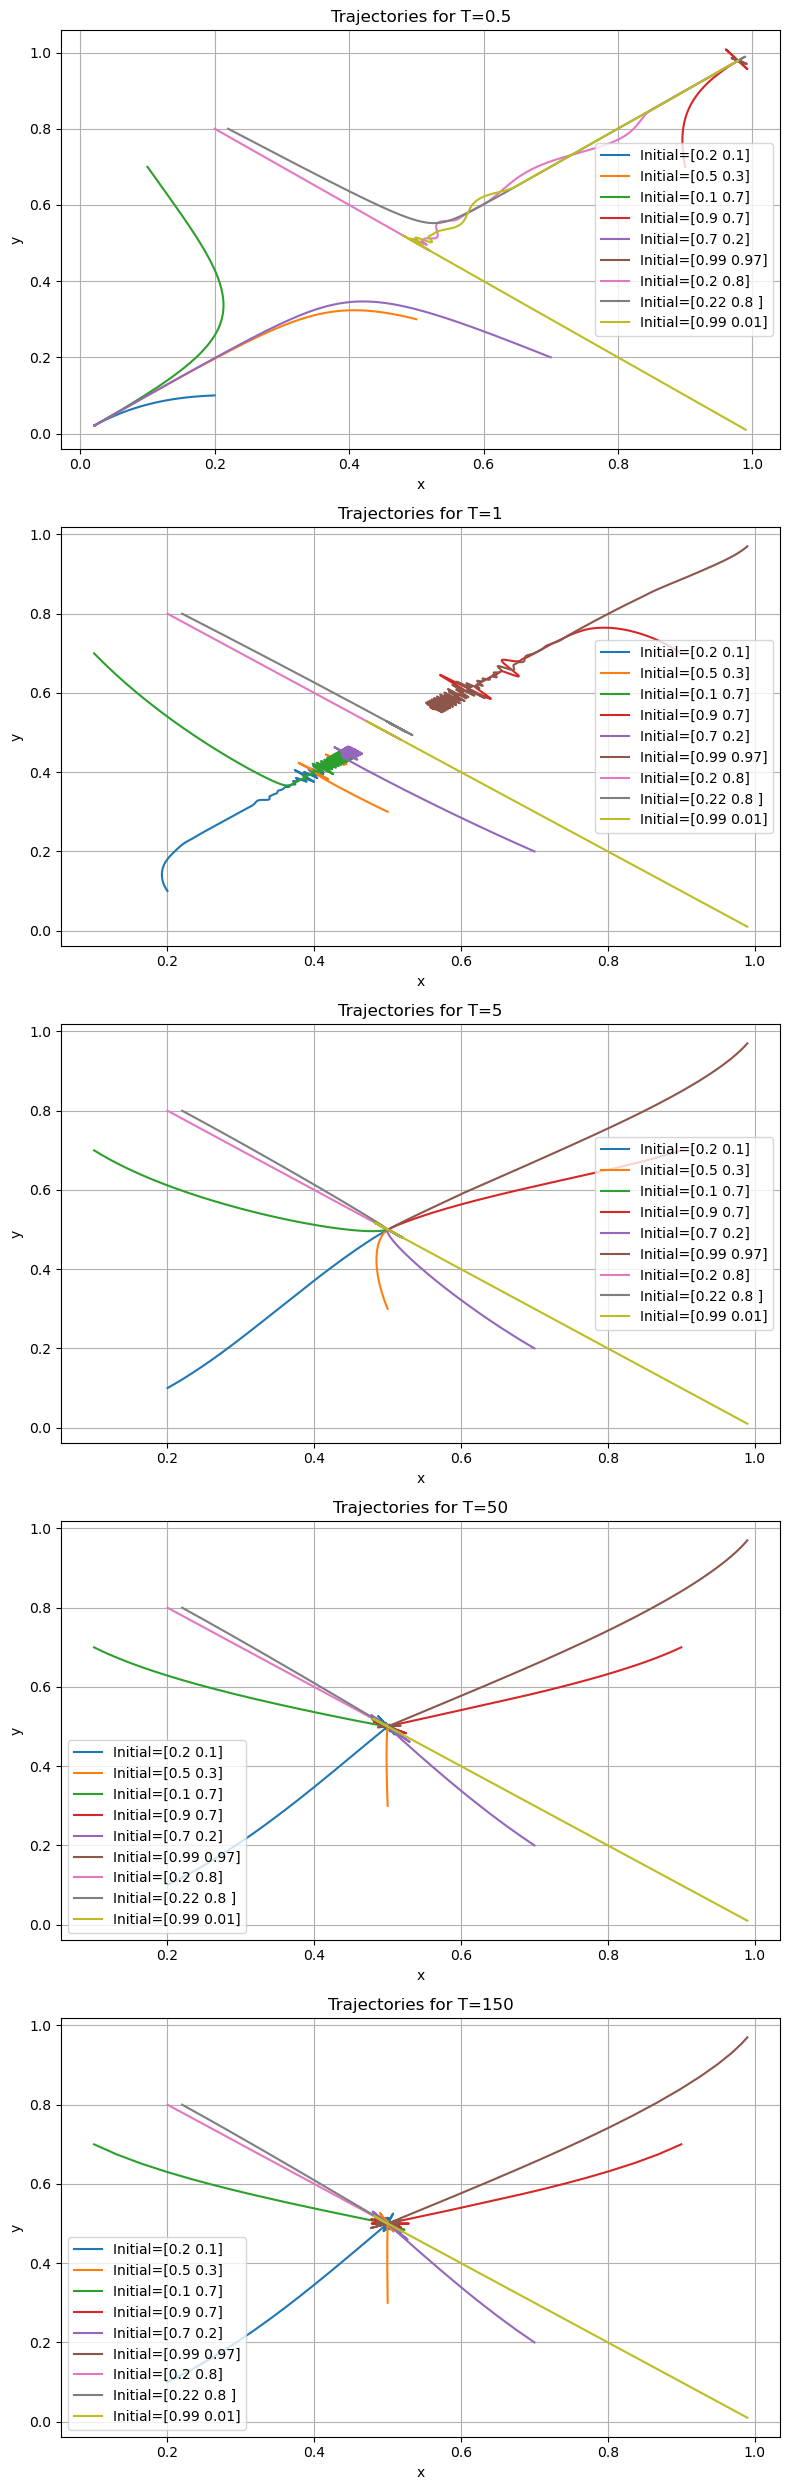

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the replicator function
def replicator(t, x, A, B, T):
    x1, y1 = x
    dx = np.zeros(2)
    dx[0] = x1 * (1 - x1) * (4 * y1 - 2) + T * x1 * (1 - x1) * np.log( (1-x1) /x1)
    dx[1] = y1 * (4 * x1 - 2) * (1 - y1) + T * y1 * (1 - y1) * np.log( (1-y1) / y1)
    return dx

# Set up parameters; not used ultimately because the computed form is earsier to read
A = np.array([[6, 0], [4, 2]])
B = A.T

# Time settings
t_step = 0.001
t_final = 100
time = np.arange(0, t_final, t_step)

# Initial values
initial_values = [
    np.array([0.2, 0.1]),
    np.array([0.5, 0.3]),
    np.array([0.1, 0.7]),
    np.array([0.9, 0.7]),
    np.array([0.7, 0.2]),
    np.array([0.99, 0.97]),
    np.array([0.2, 0.8]),
    np.array([0.22, 0.8]),
    np.array([0.99, 0.01]),
]

# T values
T_values = [  0.5 , 1, 5 , 50 ,150]

# Plots; we keep the results for different values of T on different plots.
fig, axes = plt.subplots(nrows=len(T_values), ncols=1, figsize=(8, 5 * len(T_values)))

for i, T_value in enumerate(T_values):
    for z0 in initial_values:
        sol = solve_ivp(replicator, [0, t_final], y0=z0, args=(A, B, T_value), method='DOP853', t_eval=time)
        xx = sol.y
        axes[i].plot(xx[0, :], xx[1, :], label=f'Initial={z0}')

    # Customize each subplot
    axes[i].set_title(f'Trajectories for T={T_value}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
